IMPORTING NECCESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

LOADING THE DATA SET

In [5]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\CodSoft\Task 3\Churn.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


DATA PRE - PROCESSING

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


REMOVING UNNECCESSARY COLUMNS

In [10]:
data.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


CHECKING DUPLICATE VALUES

In [13]:
data.duplicated().sum()

0

DATA VISUALAIZATION AND ANALYSIS

In [15]:
def visual_c(data):
    c_columns = data.select_dtypes(include = ['object']).columns
    
    num_cols = 2
    num_rows = (len(c_columns) + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    fig.suptitle("Distribution of Categorical Features", fontsize=16)
    
    axes = axes.flatten()
    
    for i, col in enumerate(c_columns):
        sns.barplot(
        x=data[col].value_counts().index,
        y=data[col].value_counts().values,
        ax=axes[i],
        palette='viridis'
        )
        
        axes[i].set_title(f"Distribution of {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("count", fontsize=12)
        axes[i].tick_params(axis='x')

     

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


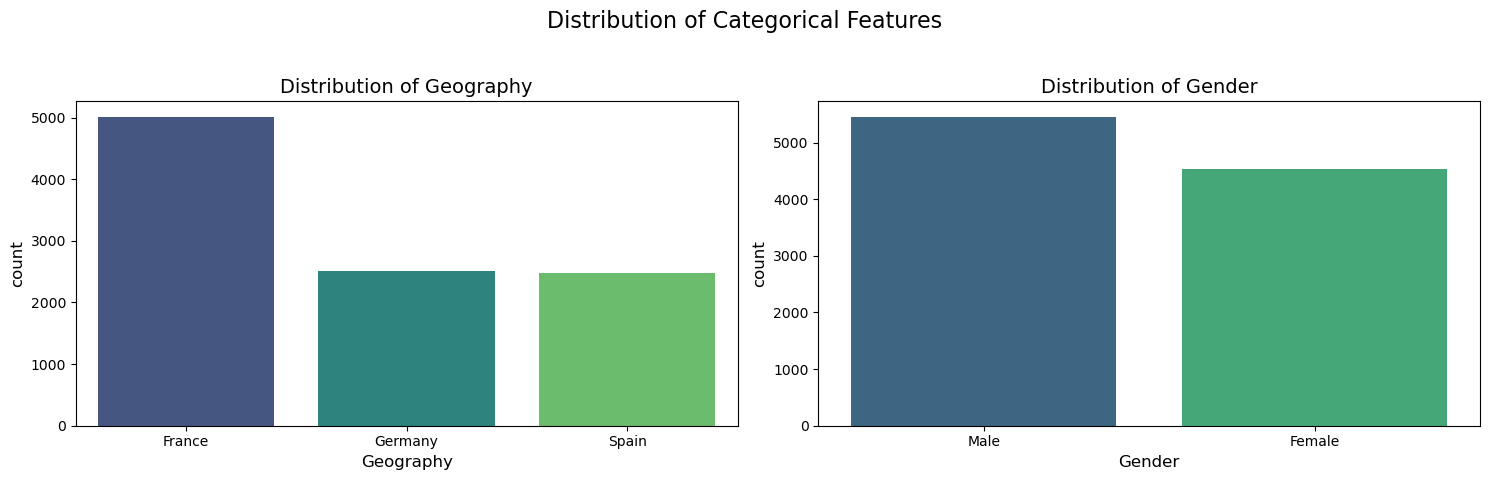

In [16]:
visual_c(data)

In [20]:
def visualize_n(data, exclude_columns=['RowNumber', 'CustomerId', "Exited"]):
    
    if exclude_columns is None:
        exclude_columns = []

    n_columns = data.select_dtypes(include=['number']).columns
    n_columns = [col for col in n_columns if col not in exclude_columns]
    
    num_cols = 3  
    num_rows = (len(n_columns) + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)
    
    axes = axes.flatten()
    
    for i, col in enumerate(n_columns):
        sns.histplot(data[col], kde=True, ax=axes[i], color="pink", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()

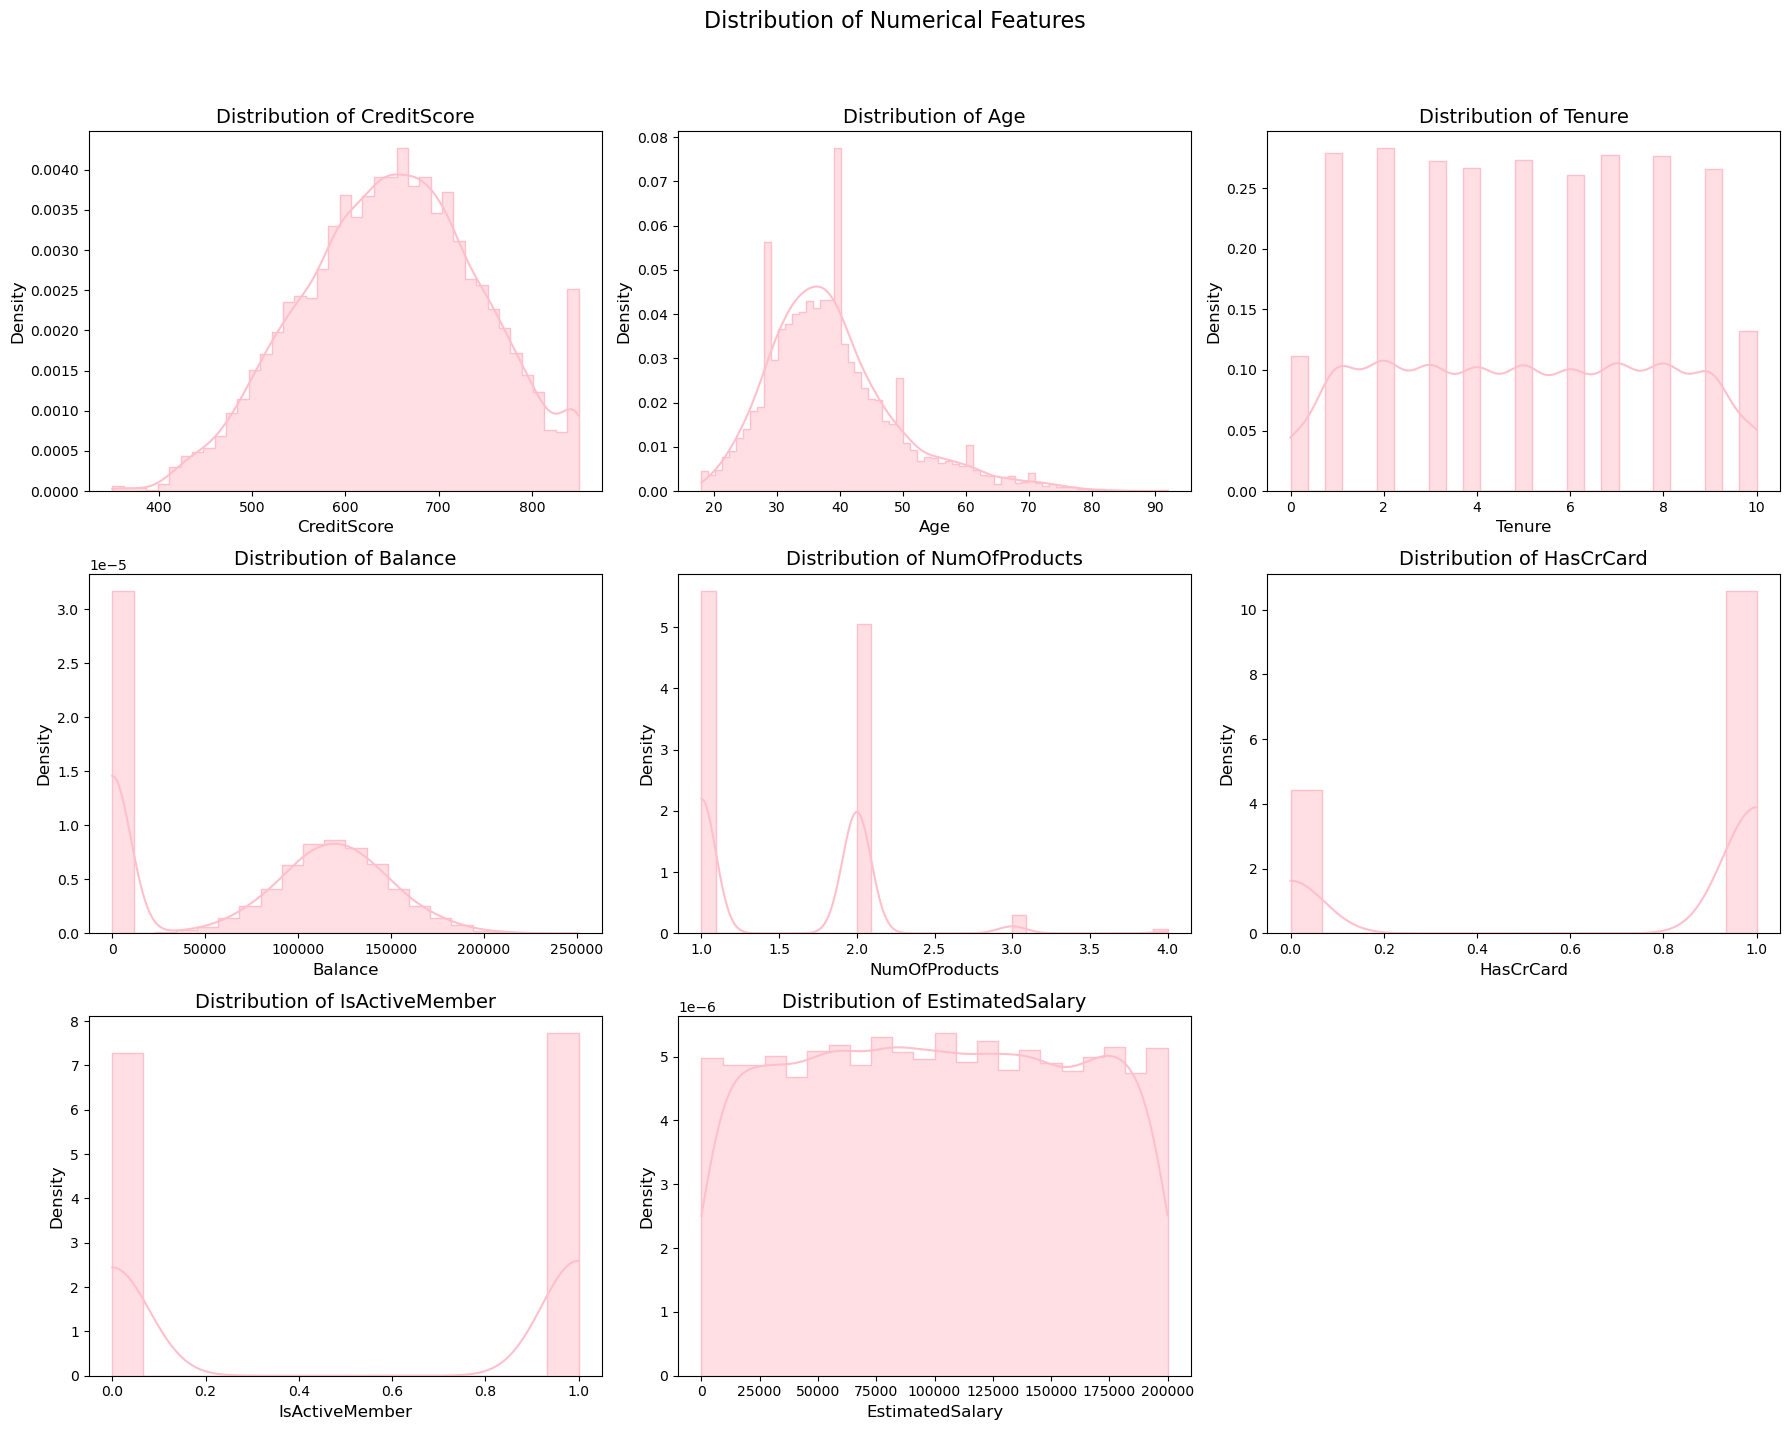

In [26]:
visualize_n(data)

LABEL ENCODER 

In [28]:
 newgeo = LabelEncoder()
data["newgeo"] = newgeo.fit_transform(data["Geography"])
data.drop(['Geography'], axis = 1, inplace = True) 

In [30]:
data['Gender'] = data['Gender'].map({'Female' : 1 , 'Male' : 0 })

In [32]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,newgeo
0,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,2
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,2


FEATURE SELECTION

In [34]:
data['Balanced_salary'] = data['Balance'] / data['EstimatedSalary']
data.drop(['Balance','EstimatedSalary'], axis = 1, inplace = True)

In [35]:
data.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,newgeo,Balanced_salary
0,619,1,42,2,1,1,1,1,0,0.000000
1,608,1,41,1,1,0,1,0,2,0.744677
2,502,1,42,8,3,1,0,1,0,1.401375
3,699,1,39,1,2,0,0,0,0,0.000000
4,850,1,43,2,1,1,1,0,2,1.587055


SPLITING DATA INTO TRAINING AND TESTING SET

In [37]:
x =  data.drop(['Exited'], axis = 1)
y = data['Exited']

In [38]:
x.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,newgeo,Balanced_salary
0,619,1,42,2,1,1,1,0,0.000000
1,608,1,41,1,1,0,1,2,0.744677
2,502,1,42,8,3,1,0,0,1.401375
3,699,1,39,1,2,0,0,0,0.000000
4,850,1,43,2,1,1,1,2,1.587055


In [39]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

MODEL SELECTION AND EVALUATION

1. RANDOM FOREST CLASSIFIER

In [43]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
RF_pred = RF.predict(x_test)

In [44]:
print("Evaluating the Random Forest Model")
print("--" * 10)
accuracy = accuracy_score(y_test,RF_pred)
print("Accuracy of Random Forest Model : {:.2f}%".format(accuracy * 100))

Evaluating the Random Forest Model
--------------------
Accuracy of Random Forest Model : 85.84%


Text(45.722222222222214, 0.5, 'Truth')

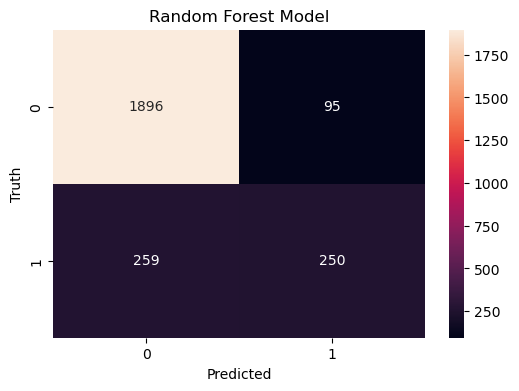

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,RF_pred),annot=True,fmt='d')
plt.title('Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Truth')

2. LOGISTIC REGRESSION

In [51]:
LG = LogisticRegression()
LG.fit(x_train,y_train)
LG_pred = LG.predict(x_test)

In [58]:
print("Evaluating the Logistic Regression Model")
print("--" * 10)
accuracy = accuracy_score(y_test,LG_pred)
print("Accuracy of Logistic Regression Model : {:.2f}%".format(accuracy * 100))

Evaluating the Logistic Regression Model
--------------------
Accuracy of Logistic Regression Model : 80.84%


Text(45.722222222222214, 0.5, 'Truth')

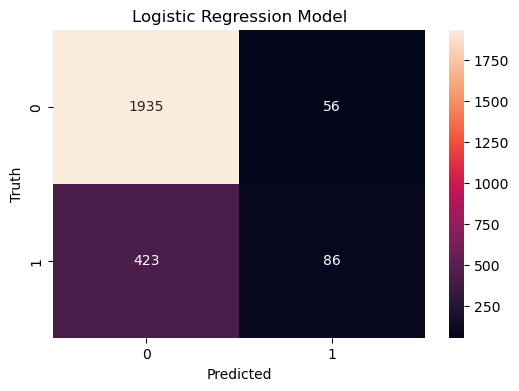

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,LG_pred),annot=True,fmt='d')
plt.title('Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Truth')

SAVING THE MODELS

In [61]:
import pickle

model_name = "b_c_churn_model.pkl"

with open(model_name, 'wb') as file:
    pickle.dump(RF, file)